# Probabilistic Computing
<hr></hr>

The field of probabilistic computing, where the concept of randomness is harnessed to enhance certain computations, is currently experiencing a resurgence driven by the explosion of machine learning and AI algorithms that exploit these effects. However, in the context of classical circuits, randomness is almost always associated with the unwanted effects from noise. Bits stored in magnetic drives can randomly flip when exposed to certain magnetic fields, a **NOT** gate could mistakenly invert its output if there's a glitch in its power supply, and every so often, a cosmic ray particle can cause enough charge accumulation to modify values in memory. 

Therefore, a natural way to introduce probabilistic effects into digital logic is by "upgrading" the concept of a bit to a probability bit (p-bit). In this context, a convenient way to represent p-bits is by the use of a [probability vector](https://en.wikipedia.org/wiki/Probability_vector), where an element of the vector represents the probability of measuring the binary value given by the vector index of that element.

## 1. Single-Bit Probabilistic Systems

### 1.1 Probabilistic Single-Bit States (p-bits)

Let us start by considering the case of a noisy **NOT** gate that, whenever its input is supposed to be $0$, the output is either $0$ with probability of $1/4$, or a $1$ with probability of $3/4$. Physically, this model could describe a poorly-designed circuit where the stage preceding the **NOT** gate is not supplying low enough of a voltage, causing the gate to toggle down to $0$ every so often due to noise:

<img src="images/01_04_03_noisy_not.png" align = "center" width="560"/>

We could represent the output state of uncertainty of this gate with a column vector, where the top element is the probability of the output being $0$, and the bottom element the probability of measuring a $1$:

$$ \vec{p} = \begin{bmatrix} \frac{1}{4} \\ \frac{3}{4} \end{bmatrix} .$$ 

More generally, a probability vector can be expressed as:

$$ \vec{p} = \begin{bmatrix} \varrho_{0} \\ \varrho_{1} \end{bmatrix} ,$$

where $\varrho_{0}$ and $\varrho_{1}$ represent the probabilities associated with the state being $0$ or $1$, respectively. Like all probabilities, these vector elements must meet the condition of being bounded between $0$ and $1$ (i.e., $\varrho_{0}, \varrho_{1} \in [0,1]$), and summing up to $1$ (i.e., $\varrho_{0} + \varrho_{1} = 1$).

From a practical standpoint, this probability vector encodes information about how likely it is to **measure** a $0$ or a $1$ for a given p-bit. Going back to the example of our noisy gate, a measurement could consist of, for example, connecting the output of the gate to a register that stores its value every clock cycle. The register's history will then look something like this:

$$ \{1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, \dots \}, $$

where for a large number of measurements $n$, the frequency of a given outcome ($n_0$ for $0$ or $n_1$ for $1$) with respect to the total number of outcomes approaches the expected probability ($\varrho_0$ or $\varrho_1$):

$$
\begin{aligned}
\lim_{n\to\infty}\frac{n_0}{n} &= \varrho_0 = \frac{1}{4}
\\
\\
\lim_{n\to\infty}\frac{n_1}{n} &= \varrho_1 = \frac{3}{4}
\end{aligned}
$$

Let's take a look at how to simulate something like this in Python. We will define a probability vector, and sample $0$ or $1$ using its probability amplitudes. We will use [Matplotlib](https://matplotlib.org/) to plot the results.


In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [2]:
# Define vector p
ϱ0, ϱ1 = (1/4, 3/4)
vec_p = np.array([[ϱ0],
                  [ϱ1]])
sp.Matrix(vec_p)

Matrix([
[0.25],
[0.75]])

In [3]:
n_samps = 200                   # number of samples
vals = [0, 1]                   # Possible outcomes: 0 or 1
probs = (vec_p).reshape(-1)     # Flatten to 1D array with probabilities for 0 and 1

# sample 0 or 1 a 100 times using probabilities from p̅
samples = np.random.choice(vals, size=n_samps, p=probs)
print(samples)

[0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0
 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1
 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1]


In [4]:
# Calculate frequency of outcomes
freq_0 = np.count_nonzero(samples == 0)/n_samps
freq_1 = np.count_nonzero(samples == 1)/n_samps

print(f'For ϱ0 = {ϱ0} and {n_samps} samples, the relative frequency of 0s is {freq_0}')
print(f'For ϱ1 = {ϱ1} and {n_samps} samples, the relative frequency of 1s is {freq_1}')

For ϱ0 = 0.25 and 200 samples, the relative frequency of 0s is 0.27
For ϱ1 = 0.75 and 200 samples, the relative frequency of 1s is 0.73


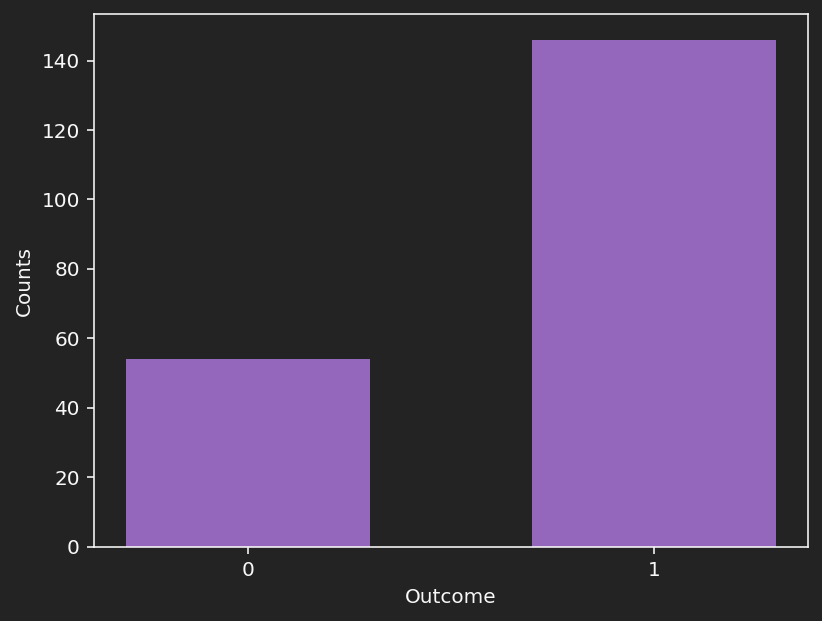

In [5]:
# Plot number of counts for outcomes 0 and 1
plt.hist(samples, bins=[-0.3, 0.3, 0.7, 1.3], color='tab:purple')
plt.xticks([0,1])
plt.xlabel('Outcome')
plt.ylabel('Counts')
plt.show()

Now, note that unlike in the previous chapter, where we relabeled the bit vector $\vec{b}$ to use ket notation $|b\rangle$, here we have opted to denote our probability vector as $\vec{p}$. We've purposely done this to emphasize that there are some distinctions between some of the properties of p-bits and qubits. For instance, recall from that the magnitude of a real-valued vector is given by its Euclidean norm:

$$ \|\vec{p}\| = \sqrt{\varrho_{0}^2 + \varrho_{1}^2} .$$

And because probabilities must always add up to $1$, the length of our vector will actually changes depending on the values of $\varrho_{0}$ and $\varrho_{1}$. For example, for $\vec{p} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$, we get $\|\vec{p}\| = 1$. On the other hand, if $\vec{p} = \begin{bmatrix} \frac{1}{4} \\ \frac{3}{4} \end{bmatrix}$, then $\|\vec{p}\| \approx 0.79$. The dotted line in the figure below shows how the magnitude of the probability vector changes for different probability values:

<img src="images/01_04_01_prob_vec_length.png" align = "center" width="200"/>

This is very different from what we will encounter for qubits, where for quantum vector $|\psi\rangle$ the sum of the each of its elements **squared** always adds up to $1$, which implies $\|\psi\| = 1$ for all $|\psi\rangle$. This is depicted below for the specific case of $\alpha_0, \alpha_1 \in [0,1]$.

<img src="images/01_04_02_prob_amps_vec_length.png" align = "center" width="200"/>

### 1.2 Probabilistic Single-Bit Gates

Let's reconsider the noisy **NOT** gate for which an input of $0$ results in an output of $0$ with probability $1/4$, and an output of $1$ with probability $3/4$. Now, let's assume that when the input to this gate is $1$, the gate behaves just as expected. This means that its output is $0$ with probability of $1$, and $1$ with probability $0$. We could then construct a matrix $P$ that relates the inputs and outputs according to this relations:

$$
\begin{aligned}
\begin{bmatrix} 1 \\ 0 \end{bmatrix} &\xrightarrow{\; \; P \; \;} \begin{bmatrix} \frac{1}{4} \\ \frac{3}{4} \end{bmatrix}
\\
\\
\begin{bmatrix} 0 \\ 1 \end{bmatrix} &\xrightarrow{\; \; P \; \;} \begin{bmatrix} 1 \\ 0 \end{bmatrix}
\end{aligned}
$$

Allowing $P$ to be a general matrix with elements $\rho_{ij}$, we can write the first of these relations as:

$$
\begin{aligned}
\begin{bmatrix} \frac{1}{4} \\ \frac{3}{4} \end{bmatrix} &= 
\begin{bmatrix} \rho_{00} & \rho_{01} \\ \rho_{10} & \rho_{11} \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix}
\\
\\
\begin{bmatrix} \frac{1}{4} \\ \frac{3}{4} \end{bmatrix} &= \begin{bmatrix} \rho_{00} \\ \rho_{10} \end{bmatrix},
\end{aligned}
$$

which implies $\rho_{00} = \frac{1}{4}$ and $\rho_{10} = \frac{3}{4}$. Similarly, for the second relation:

$$
\begin{aligned}
\begin{bmatrix} 1 \\ 0 \end{bmatrix} &= 
\begin{bmatrix} \rho_{00} & \rho_{01} \\ \rho_{10} & \rho_{11} \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix}
\\
\\
\begin{bmatrix} 1 \\ 0 \end{bmatrix} &= \begin{bmatrix} \rho_{01} \\ \rho_{11} \end{bmatrix},
\end{aligned}
$$

resulting in $\rho_{01} = 1$ and $\rho_{11} = 0$. We can then put together the matrix:

$$ P = \begin{bmatrix} \frac{1}{4} & 1 \\ \frac{3}{4} & 0 \end{bmatrix} $$

The most important thing to note about these probability matrices is that their corresponding inverse matrix $P^{-1}$ is not physically implementable. This means that we cannot associate them with any sort of reversible gates like the ones we presented in previous chapters for deterministic circuits. Intuitively, this makes sense since probabilities are a measure of uncertainty; therefore, it doesn't make sense to think that the effect of a gate that introduces randomness could be "canceled out" by some other probabilistic gate. Let us, for example, look at the inverse matrix of the example above:

$$
\begin{aligned}
P^{-1} &= \frac{1}{\rho_{00}\rho_{11} - \rho_{01}\rho_{10}} \begin{bmatrix} \phantom{-}\rho_{11} & -\rho_{01} \\ -\rho_{10} & \phantom{-}\rho_{00} \end{bmatrix}
\\
\\
P^{-1} &= \frac{1}{\frac{1}{4} \times 0 - 1 \times \frac{3}{4}} \begin{bmatrix} \phantom{-}0 & -1 \\ -\frac{3}{4} & \phantom{-}\frac{1}{4} \end{bmatrix}
\\
\\
P^{-1} &= \begin{bmatrix} 0 & \phantom{-}\frac{4}{3} \\ 1 & -\frac{1}{3} \end{bmatrix}
\end{aligned}
$$

The issue with $P^{-1}$ is that its entries must all be values between $0$ and $1$ since they should correspond to probabilities; and here, the entry $ -\frac{1}{3}$ clearly is not. As we will see in the next chapters, this is a major distinction with respect to the matrices associated with quantum circuits, which are always invertible.


In spite of this drawback, one very nice properties of p-bits is that deterministic reversible circuits do transform probability vectors in the correct manner. In the case of the $\text{X}$ gate, we can see that when applied to a p-bit, the order of the probabilities in the vector gets flipped:

$$
\begin{aligned}
\vec{p}_{out} &= \text{X } \vec{p}_{in}
\\
\\
\vec{p}_{out} &= \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \begin{bmatrix} \varrho_{0} \\ \varrho_{1} \end{bmatrix}
\\
\\
\vec{p}_{out} &= \begin{bmatrix} \varrho_{1} \\ \varrho_{0} \end{bmatrix}.
\end{aligned}
$$

This makes complete sense if we consider, for example, passing through an $\text{X}$ gate a sequence of values that have probability $\varrho_0$ of being in state $0$ and $\varrho_1$ of being in state $1$ . The output will then correspond to the inverted version of that sequence, which will then have opposite probabilities for each of the states:

<img src="images/01_04_04_pbit_thru_x_gate.png" align = "center" width="440"/>

This also generalizes to multi-bit reversible gates, as we will see in the next section. It is also worth noting that the construction of [invertible p-bit gates](https://arxiv.org/pdf/1809.04028) is not trivial, but there have been some recent efforts to develop such technology.

## 2. Multi-Bit Probabilistic Systems

### 2.1 Probabilistic Multi-Bit States

A nice property of probability vectors is that, for the case of statistically-independent p-bits, we can still use the Kronecker product to construct the vector that describes a larger system. For example, take the following two p-bits:

$$ 
\vec{p}_0 = \begin{bmatrix} \frac{1}{4} \\ \frac{3}{4} \end{bmatrix} \qquad 
\vec{p}_1 = \begin{bmatrix} \frac{2}{3} \\ \frac{1}{3} \end{bmatrix}
$$

The composite system will have a probability vector given by:

$$ 
\begin{aligned}
\vec{p} &= \vec{p}_1  \otimes \vec{p}_0
\\
\\
\vec{p} &= \begin{bmatrix} \frac{2}{3} \\ \frac{1}{3} \end{bmatrix} \otimes 
           \begin{bmatrix} \frac{1}{4} \\ \frac{3}{4} \end{bmatrix}
\\
\\
\vec{p} &= \begin{bmatrix} \frac{1}{6} \\ \frac{1}{2} \\ \frac{1}{12} \\ \frac{1}{4} \end{bmatrix} .
\end{aligned}
$$

What this is implies is that, the corresponding probabilities of measuring the four possible p-bit states $\left\{00, 01, 10, 11 \right\}$ are given by $\left\{\frac{1}{6}, \frac{1}{2}, \frac{1}{12}, \frac{1}{4}\right\}$, respectively. 


In general:

$$ 
\begin{aligned}
\vec{p} &= \vec{p}_{n-1} \otimes \, ... \otimes \, \vec{p}_1 \otimes \vec{p}_0, 
\\
\\
\vec{p} &= \bigotimes_{i=1}^{n} \vec{p}_{n-i}.
\end{aligned}
$$

And since each $\vec{p}_{i}$ is of dimension $2$, the dimension of $\vec{p}$ will be $N = 2^n$ and can be written as:

$$\vec{p} = \begin{bmatrix} \varrho_0 \\ \varrho_1 \\ \varrho_2 \\ \vdots \\ \varrho_{N - 1} \end{bmatrix}, $$

where each  $\varrho_j \in [0,1]$, and must meet the condition that probabilities need to add up to $1$:

$$\sum_{j = 0}^{N-1} \varrho_j = 1$$

### 2.2 Probabilistic Multi-Bit Gates

Just like with probability vectors, we can use the Kronecker product on single p-bit probability matrices to represent lager systems. In general:

$$ P = P_{n-1} \otimes \dots \otimes P_1 \otimes P_0, $$ 

where each $P_i$ is a $2 \times 2$ matrix acting on a single p-bit. Let's take for example the case of the deterministic $\text{X}$ gate acting on p-bit $\vec{p}_0$ and a probability matrix $R$ acting on $\vec{p}_1$ that represents a circuit whose output is always $0$ or $1$ with probability of $1/2$ independent of the input. The overall matrix for this system is given by:

$$ 
\begin{aligned}
P &= R \otimes X 
\\
\\
P &= \begin{bmatrix} \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} \end{bmatrix} \otimes \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
\end{aligned}
$$

Let's use Python to calculate the overall matrix for the system:

In [6]:
X = np.array([[0,1],
              [1,0]])
R = np.array([[1/2,1/2],
              [1/2,1/2]])

P = np.kron(R, X)

sp.Matrix(P)

Matrix([
[  0, 0.5,   0, 0.5],
[0.5,   0, 0.5,   0],
[  0, 0.5,   0, 0.5],
[0.5,   0, 0.5,   0]])

From this result, it is not entirely obvious that the system should act deterministically on $\vec{p}_0$ and randomly on $\vec{p}_1$, so let us, for example, pass an input where both p-bits are $0$. We should see a vector at the output that represents $\vec{p}_0$ being $1$ and $\vec{p}_1$ being $0$ or $1$ each with probability of $1/2$:

In [7]:
# vectors for p0 and p1 being equal to 0
p1 = p0 = np.array([[1],
                    [0]])

# p vector for composite system
p_in = np.kron(p1, p0)

sp.Matrix(p_in)

Matrix([
[1],
[0],
[0],
[0]])

In [8]:
# Multiply p_in by matrix P
p_out = P @ p_in

sp.Matrix(p_out)

Matrix([
[  0],
[0.5],
[  0],
[0.5]])

What this vector represents is finding the total system in state $01$ with probability of $1/2$ and state $11$ with probability of $1/2$, which means the p-bit corresponding to $\vec{p}_0$ is always $1$ as expected, and $\vec{p}_1$ is $0$ or $1$ with probability $1/2$, as expected. We can do this for inputs where the p-bits are not deterministic, and also check that the math still works.

In [9]:
# p0 is a vector with probabilities 2/3 and 1/3 for 0 and 1
p0 = np.array([[2/3],
               [1/3]])

# p1 is a vector with probabilities 1/10 and 9/10 for 0 and 1
p1 = np.array([[1/10],
               [9/10]])

# p vector for composite system
p_in = np.kron(p1, p0)

sp.Matrix(p_in).evalf(n=4)

Matrix([
[0.06667],
[0.03333],
[    0.6],
[    0.3]])

In [10]:
# Multiply p_in by matrix P
p_out = P @ p_in

sp.Matrix(p_out).evalf(n=4)

Matrix([
[0.1667],
[0.3333],
[0.1667],
[0.3333]])

This vector implies that the probability of finding state $00$ is $1/6$. This checks out because we initialized $\vec{p}_0$ to be $1$ with probability $1/3$, so after applying the $\text{X}$ gate, the output state should be $0$ with probability of $1/3$. In the case of $\vec{p}_1$, we always get $0$ with probability $1/2$ independent of the input, so the probability of finding $00$ is $1/3 \times 1/2 = 1/6$.

It is also possible to construct multi p-bit matrices that cannot be expressed as the Kronecker product of individual p-bit matrices. These matrices are known as [stochastic matrices](https://en.wikipedia.org/wiki/Stochastic_matrix) and represent the transition from one possible state of a system to another, where the future state of a single p-bit depends on the previous state of all other p-bits in the system. For instance, the matrix below represents a system where the state of p-bit $\vec{p}_0$ will remain unchanged if $\vec{p}_1$ is in state $0$, but will randomize $\vec{p}_0$ if $\vec{p}_1$ is in state $1$. It turns out, we cannot decompose this matrix into a Kronecker product of separate single p-bit matrices because the results of the state of a p-bit depend on the state of the other.

$$ P = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 
                       0 & 1 & 0 & 0 \\ 
                       0 & 0 & \frac{1}{2} & \frac{1}{2} \\ 
                       0 & 0 & \frac{1}{2} & \frac{1}{2} \end{bmatrix}$$
                       
Let's check the output state for when the input is $10$:

In [11]:
# Initialize p0 in 0 and p1 in 1:
p0 = np.array([[1],
               [0]])

p1 = np.array([[0],
               [1]])

# Combine states into single vector
p_in = np.kron(p1,p0)

# Define stochastic matrix
P = np.array([[1,0,0,0],
              [0,1,0,0],
              [0,0,1/2,1/2],
              [0,0,1/2,1/2]])

p_out = P @ p_in

sp.Matrix(p_out)

Matrix([
[  0],
[  0],
[0.5],
[0.5]])

This shows that, when $\vec{p}_1$ is $1$, the output is $10$ and $11$ each with probability of $1/2$, which means $\vec{p}_1$ remains unchanged, but $\vec{p}_0$ went from being $0$ to being $0$ or $1$ with equal probability.

Now, just like with single p-bit probability matrices, stochastic matrices in general are non-invertible, so they do not represent reversible circuits. But as mentioned before, when p-bits are applied to deterministic reversible matrices, their states do get inverted correctly. For instance, let's look at a general 4 p-bit vector, and pass it through a circuit given by the matrix $Q = (X \otimes I) \; \text{CX}$, and then through the circuit corresponding to $Q^{-1}$:

<img src="images/01_04_05_pbit_thru_circuit.png" align = "center" width="220"/>



In [12]:
# define general input probability vector
ϱ0, ϱ1, ϱ2, ϱ3 = sp.symbols('ϱ0, ϱ1, ϱ2, ϱ3')
p_in = sp.Matrix([ϱ0, ϱ1, ϱ2, ϱ3])
p_in

Matrix([
[ϱ0],
[ϱ1],
[ϱ2],
[ϱ3]])

In [13]:
# define CX matrix
CX = sp.Matrix([[1,0,0,0],
                [0,1,0,0],
                [0,0,0,1],
                [0,0,1,0]])
CX

Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 0, 1],
[0, 0, 1, 0]])

In [14]:
# define X ⊗ I matrix
X = np.array([[0,1],
              [1,0]])

I = np.array([[1,0],
              [0,1]])

XI = sp.Matrix(np.kron(X,I))
XI

Matrix([
[0, 0, 1, 0],
[0, 0, 0, 1],
[1, 0, 0, 0],
[0, 1, 0, 0]])

In [15]:
# compose circuit matrix
Q = XI @ CX
Q

Matrix([
[0, 0, 0, 1],
[0, 0, 1, 0],
[1, 0, 0, 0],
[0, 1, 0, 0]])

In [16]:
# pass p_in through Q
p_int = Q @ p_in
p_int

Matrix([
[ϱ3],
[ϱ2],
[ϱ0],
[ϱ1]])

In [17]:
# pass p_in through Q⁻¹
p_out = Q.inv() @ p_int
p_out

Matrix([
[ϱ0],
[ϱ1],
[ϱ2],
[ϱ3]])

As can be seen, after applying $Q^{-1}$, we recovered the original vector. This is because the matrices that represent deterministic reversible circuits are [permutation matrices](https://en.wikipedia.org/wiki/Permutation_matrix) that simply change the order of the elements of the vectors they act on. And applying the inverse simply places the elements back into their original order.

Now that we have an understanding of deterministic and probabilistic classical systems, we can dive into the world of quantum systems. In the next chapter we will introduce these ideas, and highlight how they differ from what we have discuss so far.